In [1]:
#IMPORTS
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [2]:
#MODIFIER DOMAIN VARIABLES

def mod_func_A(x):
    return x**2

def mod_func_B(x):
    return x*2/3

def rescaler(old_list, new_min, new_max):
    new_values=[]
    for old_value in old_list:
        new_values.append((((old_value - min(old_list)) * (new_max - new_min)) / (max(old_list) - min(old_list)))+ new_min)

    return new_values

# datapoints domain (min-max), min_mod_increment, max_mod_increment 
mdv={"domain_min_range":1, "domain_max_range":100, "modifier_incremental_unit":3, "modifier_data_point":10}
#mdv["modifier_data_point"] = 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def modifier_controller(interval_list=[(mdv["domain_min_range"], mdv["domain_max_range"])], selected_mod_function=mod_func_A, do_plot=False):
    # Function to control modifiers given the input and the selected modifier function. Option to plot or not. 
    
    print("\nModifier controller...")
    print('  * Interval: ',interval_list)
    all_interval_mod = []
    
    # Check if it's possible to generate more data points
    if mdv["modifier_data_point"] < mdv["modifier_incremental_unit"]:
        return False  # Exit the function if not possible
    
    for i in range(len(interval_list)):
        interval_min_range = interval_list[i][0]
        interval_max_range = interval_list[i][1]
        
        # Generate data points (incremental ticks and function modified x values) within the specified interval
        mod_ticks = np.arange(interval_min_range, interval_max_range, mdv["modifier_data_point"])
        mod_x = selected_mod_function(mod_ticks)
        
        # Normalize the function outputs to fit within the interval range
        mod_x = rescaler(mod_x, new_max=interval_max_range, new_min=interval_min_range)
        print('  * Mod_x:   ',mod_x)
        all_interval_mod.append(mod_x)
    
    # update the mdv to decrease the interdatapoint distance for the next itteration
    mdv["modifier_data_point"] = mdv["modifier_data_point"] - mdv["modifier_incremental_unit"]
    
    if do_plot == True:
        # Plot the generated data points
        for mod_x in all_interval_mod:
            plt.scatter(mod_x, np.ones(np.shape(mod_x)))
            plt.show()
    
    return all_interval_mod


In [80]:
#SIMULATOR - data substitution in Sim function
def sim_func_A(x):
    noise = np.random.normal(-10000,10000,len(x))
    return x**3-x**2+noise

def sim_func_B(x):
    return x*2/3

def simulator(mod_x, selected_function=sim_func_A):
    print("\nSimulator...")
    all_interval_sim =[]

    if mod_x == False: 
        return False # possible itterations have ended
    elif np.shape(mod_x)[0]==1: 
        simulated_y = selected_function(np.array(mod_x))
        all_interval_sim.append(list(simulated_y[0]))
    else:
        for i in range(np.shape(mod_x)[0]):
            simulated_y = selected_function(np.array(mod_x[i]))
            all_interval_sim.append(list(simulated_y[0]))
    print('  * Sim_y:   ',all_interval_sim)
    return all_interval_sim



Modifier controller...
  * Interval:  [(1, 100)]
  * Mod_x:    [1.0, 2.4347826086956523, 6.260869565217392, 12.478260869565217, 21.08695652173913, 32.086956521739125, 45.47826086956522, 61.26086956521739, 79.43478260869566, 100.0]

Simulator...
  * Sim_y:    [[6286.91885195328, 6295.42448193602, 6493.1369829633895, 8074.164352076564, 15218.779622891061, 38293.20306334473, 98280.06983411816, 232439.5831077271, 501201.35264828766, 996286.9188519532]]

Modifier controller...
  * Interval:  [[1, 50], [60, 90]]
  * Mod_x:    [1.0, 2.6704545454545454, 6.9393939393939394, 13.806818181818182, 23.272727272727273, 35.33712121212121, 50.0]
  * Mod_x:    [60.0, 66.4358108108108, 73.58108108108108, 81.4358108108108, 90.0]

Simulator...
1.0


TypeError: len() of unsized object

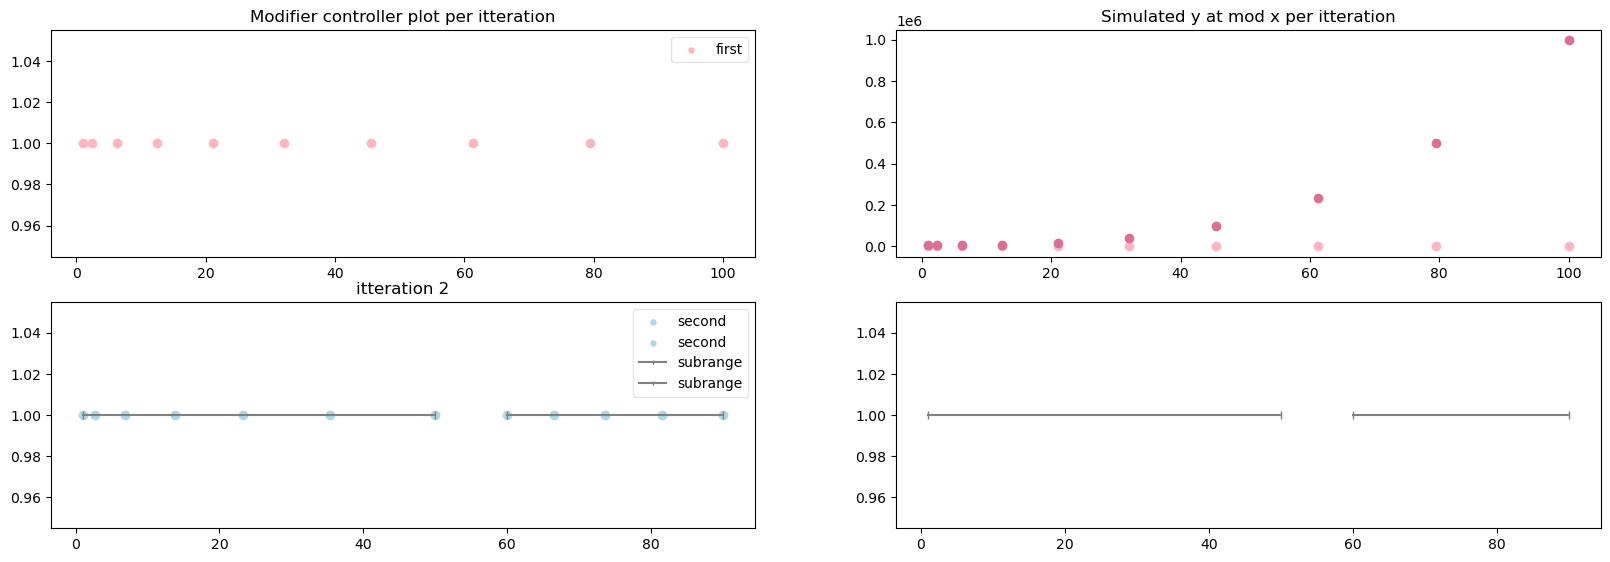

In [81]:
# PLACEHOLDER FOR THE MAIN FUNCTION
mainfunc=True
while mainfunc==True:
    # datapoints domain (min-max), min_mod_increment, max_mod_increment 
    mdv={"domain_min_range":1, "domain_max_range":100, "modifier_incremental_unit":3, "modifier_data_point":10}
    #mdv["modifier_data_point"] = 2

    plt.figure(figsize = (20,10))
    appendedvars=[]

    plt.subplot(321)
    plt.title('Modifier controller plot per itteration')
    mod_x_list = modifier_controller(interval_list=[(mdv["domain_min_range"], mdv["domain_max_range"])],do_plot=False,selected_mod_function=mod_func_A)
    plt.scatter(mod_x_list, np.ones(np.shape(mod_x_list)),label='first',color='lightpink')
    plt.legend(framealpha=0.5, markerscale=0.6)
    appendedvars.append(mod_x_list)


    plt.subplot(322)
    plt.title('Simulated y at mod x per itteration')
    sim_y_list = simulator(mod_x=mod_x_list,selected_function=sim_func_A)
    assert np.shape(mod_x_list) == np.shape(sim_y_list)
    plt.scatter(mod_x_list,np.ones(np.shape(mod_x_list)),color='lightpink')
    plt.scatter(mod_x_list,sim_y_list,color='palevioletred')

    plt.subplot(323)
    plt.title('itteration 2')
    ranges=[[1,50],[60,90]]
    mod_x_list_2 = modifier_controller(ranges,do_plot=False)
    for vars in mod_x_list_2:
        plt.scatter(vars, np.ones(np.shape(vars)),label='second',color='lightblue')
    [plt.plot(ranges[i],np.ones(np.shape(ranges[i])),marker='|', color='gray',label='subrange') for i in [0,1]]
    appendedvars.append(mod_x_list_2)
    plt.legend(framealpha=0.5, markerscale=0.6)
    appendedvars=[val for val in appendedvars]

    plt.subplot(324)
    mod_x=mod_x_list_2 #not mod_x_list_2
    colors=[['deepskyblue'],['steelblue']]
    [plt.plot(ranges[i],np.ones(np.shape(ranges[i])),marker='|', color='gray',label='subrange') for i in [0,1]]
    for i in range(np.shape(ranges)[0]):
        sim_y_list = simulator(mod_x[i],selected_function=sim_func_A)
        assert np.shape(mod_x[i]) == np.shape(sim_y_list)
        # plt.scatter(mod_x,np.ones(np.shape(mod_x)))
        plt.scatter(mod_x[i],sim_y_list,color=colors[i])


    plt.subplot(325)
    plt.title('itteration 3')
    ranges = [[25,50],[75,90]] # USE VALIDATOR FUNCTION TO GET NEW RANGES if enough itterations
    mod_x_list_3 = modifier_controller(ranges,do_plot=False)
    for vars in mod_x_list_3:
        plt.scatter(vars, np.ones(np.shape(vars)),label='third',color='lightgreen')
    [plt.plot(ranges[i],np.ones(np.shape(ranges[i])),marker='|', color='gray') for i in [0,1]]
    appendedvars.append(mod_x_list_3)
    plt.legend(framealpha=0.5, markerscale=0.6)
    appendedvars=[val for val in appendedvars]


    plt.subplot(326)
    mod_x=mod_x_list_3 #not var2
    colors=[['springgreen'],['yellowgreen']]
    [plt.plot(ranges[i],np.ones(np.shape(ranges[i])),marker='|', color='gray') for i in [0,1]]
    for i in range(np.shape(ranges)[0]):
        sim_y_list = simulator(mod_x[i],selected_function=sim_func_A)
        assert np.shape(mod_x[i]) == np.shape(sim_y_list)
        # plt.scatter(mod_x,np.ones(np.shape(mod_x)))
        plt.scatter(mod_x[i],sim_y_list,color=colors[i])
    plt.show()
    
    mainfunc = False

In [ ]:
# https://stackoverflow.com/questions/39434402/how-to-get-confidence-intervals-from-curve-fit

 ### Validator class, that will have information about the histroy of simulator ranges that are within the threshhol. 
 Otherwise, rerun modifier + simulator until ranges are within threshhold OR no more itteration are possible.

 def approximator(mody, sim_y_list):
* Create curve fitting of the new sim values 
    
* calculate R square of points
    
* get intervals of bad approximation
    
* generate new modx and mody points within new intervals
    
* simulate data using new and old modx points 
    
* rerun approximator until threshhold reached (testing is 30 recurrances for now)


### Steps of Main function: 
##### Modifier 
    gets range(s) 
    makes mod_y points in that range given the increment
    returns mod_x mod_y mod points
    
##### Simulator
    gets list(s) of (x = mod_y) values
    returns list(s) of simulated [mod_x,sim_y] values
    
##### validator (VALS-LIST)
    sets history
    while(VALS-LIST != False or CURVE-FIT-OK)
        gets lists of [mod_x, sim_y] values
        updates history with values
        fits the [mod_x,sim_y] data using curve fitting
        finds ranges where data does not fit well according to hardcoded threshold
        returns the bas ranges
        
intervals: 
- if first point is wrong, get global minimum as min range. if last point wrong, get global max as mas range
- point before wrong point will be min, point after wrong point will be max. 
- if first point is not fit well, then that point is the new min of range. 
- if first point are not fit well, then they are the new min and max of range, respectfully. 
- local min vs global min for data generation
- given that point x_2 fall our of curve fit, then range will become [0.6]

        call modifier_controller for new points in bad interval(s)
        call simulator for simulating with new points in bad interval(s)
        updates history 
        curve fitting in bad intervals

## Part TWO
modifier and simulator working in dynamic way, with hardcoded ranges
* next step, extract the ranges 



In [84]:
# PLACEHOLDER FOR THE MAIN FUNCTION V2
from Validator import Validator

# Instantiate mdv values
mdv={"domain_min_range":1, "domain_max_range":100, "modifier_incremental_unit":3, "modifier_data_point":10}
# Create an instance of the Validator Class
validate = Validator()
appendedvars=[]

mainfunc=True
while mainfunc==True:
    # Run Modifier Controller Function
    mod_x_list = modifier_controller(interval_list=[(mdv["domain_min_range"], mdv["domain_max_range"])],do_plot=False,selected_mod_function=mod_func_A)
    # appendedvars.append(mod_x_list)
    if mod_x_list == False:
        print('*   ITTERATIONS END HERE   *')

    # Run Simulator Fuction
    # for i in range(np.shape(mod_x_list)[0]):
    sim_y_list = simulator(mod_x_list,selected_function=sim_func_A)
    assert np.shape(mod_x_list) == np.shape(sim_y_list)
    x=1
    # Get ranges of unfit points ( IF ANY )
    # ranges = validate.get_unfitting_ranges(mod_x_list,sim_y_list)
    if x ==1: 
        ranges = [[0,5],[40,50]]
        x=2
    else: ranges = False
    if mod_x_list == False or not ranges: 
        mainfunc=False
        print('this should print')


# TODO: 
# Validator needs to work as a loop within itseft that accepts 3 different sets of points
# understand curve fitting
# Fix ranges



Modifier controller...
  * Interval:  [(1, 100)]
  * Mod_x:    [1.0, 2.4347826086956523, 6.260869565217392, 12.478260869565217, 21.08695652173913, 32.086956521739125, 45.47826086956522, 61.26086956521739, 79.43478260869566, 100.0]

Simulator...
  * Sim_y:    [[-12549.08906006972, -12540.58343008698, -12342.87092905961, -10761.843559946436, -3617.228289131939, 19457.195151321732, 79444.06192209516, 213603.5751957041, 482365.34473626467, 977450.9109399302]]

Modifier controller...
  * Interval:  [(1, 100)]
  * Mod_x:    [1.0, 1.6364285714285716, 3.262857142857143, 5.8792857142857144, 9.485714285714286, 14.082142857142857, 19.66857142857143, 26.245, 33.81142857142857, 42.36785714285714, 51.91428571428571, 62.450714285714284, 73.97714285714285, 86.49357142857143, 100.0]

Simulator...
  * Sim_y:    [[-15665.960947370895, -15664.256656273592, -15641.870034531245, -15497.303554881464, -14902.426766612878, -13071.683747707993, -8443.973646986055, 1722.795683754106, 21844.480967591207, 58590.8

IndexError: tuple index out of range

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler

x_values = mod_x_list
y_values = sim_y_list

x_scaler, y_scaler = StandardScaler(), StandardScaler()
x_train = x_scaler.fit_transform(x_values)
y_train = y_scaler.fit_transform(y_values)

# fit model
model = HuberRegressor(epsilon=1)
model.fit(x_train, y_train.ravel())

# Fit curve to the data
fitted_curve = np.polyfit(x_values, y_values, 1)
return fitted_curve

ValueError: Found input variables with inconsistent numbers of samples: [1, 10]

In [19]:
x_values

[[1.0,
  2.4347826086956523,
  6.260869565217392,
  12.478260869565217,
  21.08695652173913,
  32.086956521739125,
  45.47826086956522,
  61.26086956521739,
  79.43478260869566,
  100.0]]